In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from zipfile import ZipFile

In [2]:
if not os.path.exists('housing.csv'):
    with ZipFile('dataset.zip', 'r') as zipObj:
        zipObj.extractall()
df = pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [4]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


### Step 1: Find the missing values

In [5]:
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

### Step 2: Droping unwanted columns
This step will remove the columns that are not needed in the dataset like url, region_url, image_url and description.

In [6]:
df.drop(['url', 'region_url', 'image_url', 'description'], inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   region                   384977 non-null  object 
 2   price                    384977 non-null  int64  
 3   type                     384977 non-null  object 
 4   sqfeet                   384977 non-null  int64  
 5   beds                     384977 non-null  int64  
 6   baths                    384977 non-null  float64
 7   cats_allowed             384977 non-null  int64  
 8   dogs_allowed             384977 non-null  int64  
 9   smoking_allowed          384977 non-null  int64  
 10  wheelchair_access        384977 non-null  int64  
 11  electric_vehicle_charge  384977 non-null  int64  
 12  comes_furnished          384977 non-null  int64  
 13  laundry_options          305951 non-null  object 
 14  park

### Step 3: Drop rows with the null values
Rows with missing information might not be useful. So droping the rows with null values.

In [8]:
df.dropna(axis=0, inplace=True)

### Step 4: Rename columns
Now lets rename some of the columns to short and consistant format

In [9]:
df.rename(columns={'electric_vehicle_charge': 'ev_charging', 'comes_furnished': 'furnished', 'lat': 'latitude', 'long': 'longitude'}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235970 entries, 0 to 384976
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 235970 non-null  int64  
 1   region             235970 non-null  object 
 2   price              235970 non-null  int64  
 3   type               235970 non-null  object 
 4   sqfeet             235970 non-null  int64  
 5   beds               235970 non-null  int64  
 6   baths              235970 non-null  float64
 7   cats_allowed       235970 non-null  int64  
 8   dogs_allowed       235970 non-null  int64  
 9   smoking_allowed    235970 non-null  int64  
 10  wheelchair_access  235970 non-null  int64  
 11  ev_charging        235970 non-null  int64  
 12  furnished          235970 non-null  int64  
 13  laundry_options    235970 non-null  object 
 14  parking_options    235970 non-null  object 
 15  latitude           235970 non-null  float64
 16  lo

### Step 5: Drop duplicate data
Now let's check for duplicate rows and remove them.

In [11]:
df.drop_duplicates()

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,ev_charging,furnished,laundry_options,parking_options,latitude,longitude,state
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
6,7049020738,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5118,-119.802,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,7049202533,sacramento,1960,apartment,1198,2,2.0,1,1,1,0,0,0,w/d in unit,carport,38.4962,-121.530,ca
384972,7049053337,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
384974,7049050454,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,ca
384975,7049050149,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,ca


### Step 6: Outliers
Outliers are numerical values that lie significantly outside of the statistical norm. Like duplicates, outliers need to be removed. 

In [12]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,ev_charging,furnished,latitude,longitude
count,2.359700e+05,2.359700e+05,2.359700e+05,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000
mean,7.041021e+09,1.351126e+04,1.105269e+03,1.927669,1.478785,0.779315,0.753151,0.642989,0.104157,0.017549,0.058219,37.891031,-94.220101
std,8.871302e+06,5.699286e+06,2.436786e+04,3.901174,0.628180,0.414709,0.431179,0.479119,0.305465,0.131305,0.234158,5.633149,16.975120
min,7.004032e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035925e+09,8.190000e+02,7.500000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.963100,-105.070000
50%,7.043394e+09,1.059000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.594300,-89.401500
75%,7.048516e+09,1.464000e+03,1.154000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.736300,-81.569100
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,172.633000


max number for beds and baths columns have an outlier of 1100 and 75 respectively. That numbers are far above the 75% and should be removed. Lets plot the boxplot and to find the outliers.

<AxesSubplot:xlabel='beds'>

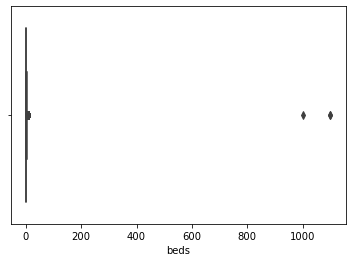

In [13]:
sns.boxplot(x=df['beds'])

<AxesSubplot:xlabel='baths'>

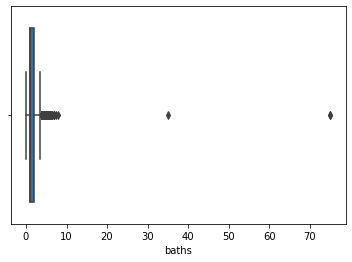

In [14]:
sns.boxplot(x=df['baths'])

#### Remove the outlier data
We're using Z-score method to identify the oulier and remove it. Z-score is the measure of how many standard deviation away the data point is

In [15]:
df = df[np.abs(stats.zscore(df["beds"])) <= 3]

<AxesSubplot:xlabel='beds'>

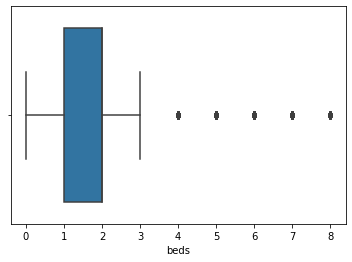

In [16]:
sns.boxplot(x=df['beds'])

In [17]:
df = df[np.abs(stats.zscore(df["baths"])) <= 4]

<AxesSubplot:xlabel='baths'>

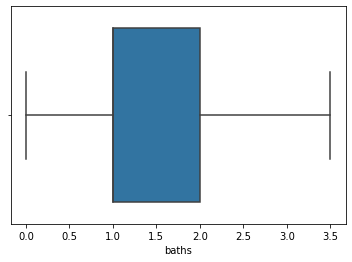

In [18]:
sns.boxplot(x=df['baths'])

If you look at the above plot, the values are with in the normal distribution after removing the outliers.

In [20]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,ev_charging,furnished,latitude,longitude
count,2.349520e+05,2.349520e+05,2.349520e+05,234952.000000,234952.000000,234952.000000,234952.000000,234952.000000,234952.000000,234952.000000,234952.000000,234952.000000,234952.000000
mean,7.041030e+09,1.355552e+04,1.095698e+03,1.904214,1.466087,0.780338,0.753928,0.643421,0.103519,0.017561,0.056501,37.900708,-94.225395
std,8.868926e+06,5.711619e+06,2.432969e+04,0.868524,0.557901,0.414018,0.430722,0.478990,0.304636,0.131350,0.230887,5.629121,16.973101
min,7.004032e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,7.035934e+09,8.190000e+02,7.500000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.972400,-105.073000
50%,7.043404e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.607200,-89.412150
75%,7.048519e+09,1.460000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.744500,-81.563700
max,7.051292e+09,2.768307e+09,8.388607e+06,8.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,94.124800
